In [1]:
num_class = 37
model_path = '/media/ruanjiacheng/新加卷/ecodes/Prompt/CV/KDPEFT/best_adapter_output/oxford_iiit_pet.pth.tar'
img_dir = '/media/ruanjiacheng/新加卷/ecodes/Prompt/data/vtab-1k/oxford_iiit_pet/images/val200/000197.jpg'

(array([2., 0., 0., 1., 1., 0., 1., 1., 0., 2., 1., 1., 0., 0., 6., 2., 1.,
        1., 0., 0., 1., 1., 1., 0., 1., 2., 0., 3., 1., 1., 1., 1., 0., 1.,
        2., 0., 1.]),
 array([-3.96108747, -3.76961517, -3.57814288, -3.38667059, -3.19519806,
        -3.00372577, -2.81225348, -2.62078118, -2.42930889, -2.2378366 ,
        -2.04636431, -1.8548919 , -1.6634196 , -1.47194719, -1.2804749 ,
        -1.08900261, -0.89753026, -0.70605797, -0.51458561, -0.32311329,
        -0.13164099,  0.05983134,  0.25130367,  0.44277599,  0.63424832,
         0.82572067,  1.01719296,  1.20866525,  1.40013766,  1.59160995,
         1.78308225,  1.97455454,  2.16602683,  2.35749912,  2.54897165,
         2.74044394,  2.93191624,  3.12338853]),
 <BarContainer object of 37 artists>)

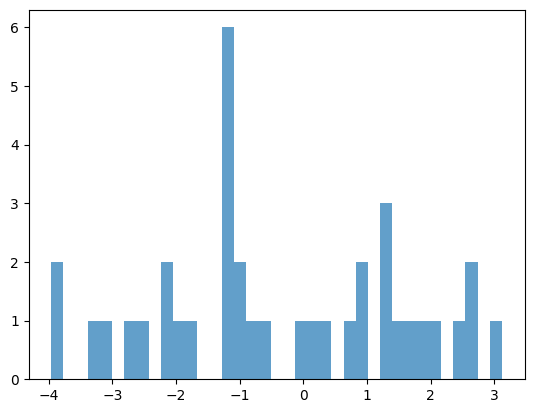

In [2]:
import matplotlib.pyplot as plt
from torchvision.transforms import Compose, Resize, ToTensor, Normalize
import torch
from PIL import Image
import os
import numpy as np

from timm.models import create_model
from models import vision_transformer_original_attvis
from data import create_loader, create_dataset
import cv2


# 加载预训练的 ViT 模型
model = create_model(
    'vit_base_patch16_224_in21k',
    pretrained=True,
    num_classes=num_class,
    scriptable=True)
model = model.to('cuda')  # 将模型移动到CUDA设备上
model.eval()


# 图像预处理
def preprocess_image(img_path):
    transform = Compose([
        Resize((224, 224)),
        ToTensor(),
        Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    image = Image.open(img_path).convert('RGB')
    return transform(image).unsqueeze(0)

    # 图片路径
image_dir = img_dir
inputs = preprocess_image(image_dir).cuda()


# 前向传递
with torch.no_grad():
    x, last_hidden_state, attentions = model(inputs)

cls_logits = x.detach().cpu().numpy().flatten()
plt.hist(cls_logits, bins=num_class, alpha=0.7)


#---------- gist_Adapter wad used! ----------#
#---------- gist_Adapter wad used! ----------#
#---------- gist_Adapter wad used! ----------#
#---------- gist_Adapter wad used! ----------#
#---------- gist_Adapter wad used! ----------#
#---------- gist_Adapter wad used! ----------#
#---------- gist_Adapter wad used! ----------#
#---------- gist_Adapter wad used! ----------#
#---------- gist_Adapter wad used! ----------#
#---------- gist_Adapter wad used! ----------#
#---------- gist_Adapter wad used! ----------#
#---------- gist_Adapter wad used! ----------#


(array([3., 1., 2., 4., 0., 1., 2., 1., 5., 2., 0., 2., 6., 2., 0., 2., 2.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1.]),
 array([-5.45545149, -4.91183043, -4.36820936, -3.82458806, -3.28096676,
        -2.7373457 , -2.19372439, -1.65010321, -1.10648203, -0.56286085,
        -0.0192397 ,  0.52438146,  1.0680027 ,  1.61162388,  2.15524507,
         2.69886613,  3.24248743,  3.78610849,  4.32972956,  4.8733511 ,
         5.41697216,  5.96059322,  6.50421429,  7.04783583,  7.59145689,
         8.13507843,  8.67869949,  9.22232056,  9.76594162, 10.30956268,
        10.85318375, 11.39680481, 11.94042587, 12.48404789, 13.02766895,
        13.57129002, 14.11491108, 14.65853214]),
 <BarContainer object of 37 artists>)

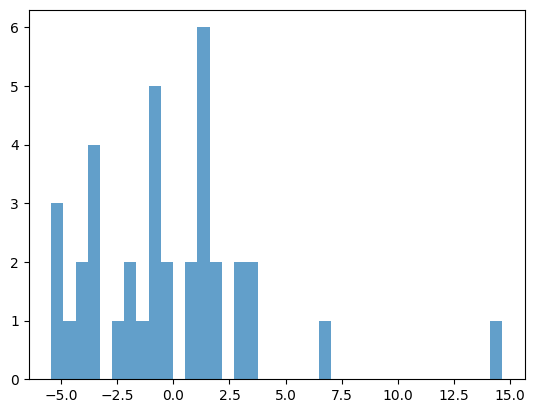

In [3]:
import matplotlib.pyplot as plt
from torchvision.transforms import Compose, Resize, ToTensor, Normalize
import torch
from PIL import Image
import os
import numpy as np

from timm.models import create_model
from models import vision_transformer_gist_adapter_attvis
from data import create_loader, create_dataset
import cv2


# 加载预训练的 ViT 模型
model = create_model(
    'vit_base_patch16_224_in21k',
    pretrained=False,
    num_classes=num_class,
    scriptable=True,
    checkpoint_path=model_path,
    tuning_mode='gist_adapter')
model = model.to('cuda')  # 将模型移动到CUDA设备上
model.eval()


# 图像预处理
def preprocess_image(img_path):
    transform = Compose([
        Resize((224, 224)),
        ToTensor(),
        Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    image = Image.open(img_path).convert('RGB')
    return transform(image).unsqueeze(0)

    # 图片路径
image_dir = img_dir
inputs = preprocess_image(image_dir).cuda()


# 前向传递
with torch.no_grad():
    x, last_hidden_state, attentions = model(inputs)

cls_logits = x.detach().cpu().numpy().flatten()
plt.hist(cls_logits, bins=num_class, alpha=0.7)